* 這篇的練習[來源](https://machine-learning-python.kspax.io/Classification/ex2_normal_and_shrinkage_linear_discriminant_anal_.html)
* 學到np.hstack 水平連接矩陣   ＃註一
* 新的生成資料方式 sklearn.datasets中的make_bobls

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

#定義資料生成
def generate_data(n_samples,n_features):
    X,y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2],
                                                                  [2]])  
    #因為2行1列矩陣設立中心點時，-2對應特徵0，2對應特徵1
    #到時跑出來的資料應該要有0特徵的會較接近-2，反之依然
    if n_features > 1:
        X = np.hstack([X,np.random.randn(n_samples, n_features -1)])
    return X, y

* 先測試看看定義的函式

In [15]:
X, y = generate_data(10,5)

test_df = pd.DataFrame(np.hstack([y.reshape(10,1),X]))
test_df.columns = ['y','X0','X1','X2','X3','X4']       
print(test_df)

     y        X0        X1        X2        X3        X4
0  0.0 -1.722874 -0.229072 -0.367366 -0.956760  0.686842
1  1.0  2.327816  1.356327 -0.070486 -0.398965 -1.008963
2  1.0  1.012618  0.343678  0.413741  1.839757 -0.559598
3  1.0  2.422270 -0.888544  0.404114  0.293459  0.860370
4  0.0 -1.615907  0.863126  0.306499  0.101298 -0.769888
5  0.0 -2.549853 -0.228399 -0.052625  0.402625  1.126751
6  0.0 -2.754000  0.588417  1.366014 -0.287131 -0.365661
7  0.0 -2.091338  0.512486 -0.189783 -1.140886  0.926691
8  1.0  1.329037 -0.086326  1.341371  1.230122  0.883969
9  1.0  0.486787 -0.392884  0.980454 -1.977251  0.260871


* 可以看出有1特徵的X0數字會較接近2，而有特徵0的X0會接近-2(如果把中心定義的更分散會更明顯)

In [22]:
#改變特徵數量並測試shrinkage之功能

n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

result_clf1 , result_clf2 = [],[] #放置結果的空數列
n_features_range = range(1, n_features_max -1, step) #設定不同特徵數量

for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):         #測試多次分類器，原來可以用_ 不用當變數，而是跑整個過程數次！
        #生成訓練資料
        X, y = generate_data(n_train, n_features)  #建立有n_train個的數據，n_features個的特徵
        
        #訓練分類器
        clf1 = LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr').fit(X,y)
        clf2 = LinearDiscriminantAnalysis(shrinkage=None, solver='lsqr').fit(X,y)
        
        #訓練完，生成測試資料，紀錄準確率
        X, y = generate_data(n_test, n_features)
        
        score_clf1 += clf1.score(X,y)
        score_clf2 += clf2.score(X,y)
    
    #算出平均準確率（在不同特徵下），因為前面score的準確率被加了n_averages次，所以要除，求平均
    result_clf1.append(score_clf1 / n_averages)
    result_clf2.append(score_clf2 / n_averages)
print(result_clf1)
print(result_clf2)
    

[0.97370000000000001, 0.9675999999999999, 0.9677, 0.96200000000000008, 0.95420000000000016, 0.94359999999999999, 0.94239999999999957, 0.93889999999999996, 0.92980000000000007, 0.93810000000000027, 0.92559999999999987, 0.91239999999999999, 0.91680000000000017, 0.92319999999999991, 0.91060000000000019, 0.90220000000000011, 0.9042, 0.88750000000000018, 0.87660000000000016]
[0.97370000000000001, 0.95070000000000021, 0.9174000000000001, 0.86060000000000003, 0.72560000000000036, 0.77589999999999992, 0.79579999999999995, 0.79250000000000009, 0.49229999999999996, 0.52259999999999995, 0.48839999999999989, 0.50619999999999987, 0.48229999999999995, 0.49029999999999996, 0.498, 0.48520000000000002, 0.50590000000000013, 0.49409999999999998, 0.49130000000000007]


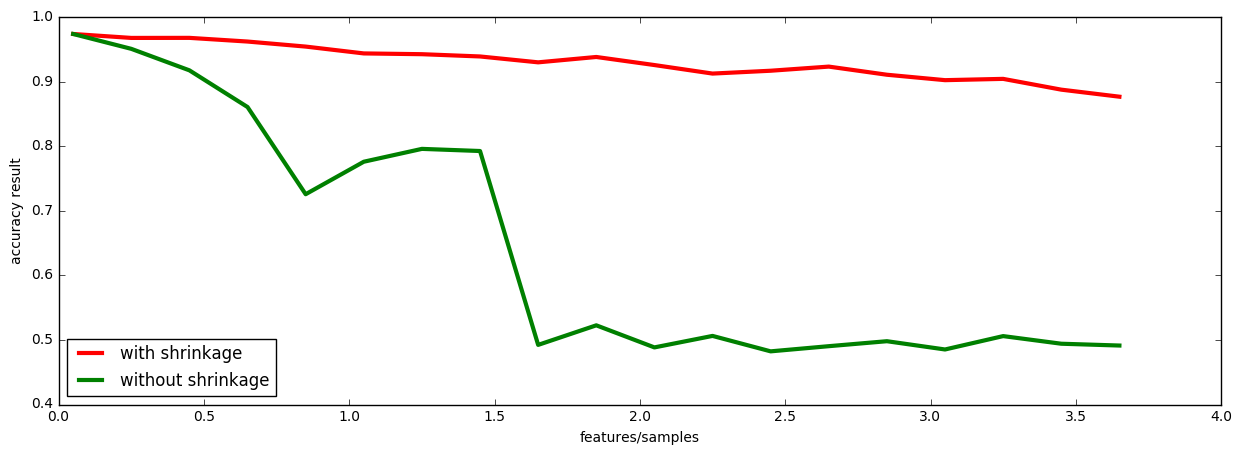

In [28]:
# 顯示LDA判別結果

features_samples_ratio = np.array(n_features_range) / n_train  #x軸

plt.figure(figsize=(15,5))
plt.plot(features_samples_ratio, result_clf1, lw=3, color='r', label='with shrinkage')
plt.plot(features_samples_ratio, result_clf2, lw=3, color='g', label='without shrinkage')
plt.legend(loc='best')

plt.xlabel('features/samples')
plt.ylabel('accuracy result')

plt.show()


* 可以看出 當有開shrinkage時，當特徵數量變多時，依然能保持一定的準確度

### 註一
numpy.hstack()函数
函数原型：numpy.hstack(tup)  
其中tup是arrays序列，The arrays must have the same shape, except in the dimensioncorresponding to axis (the first, by default).
等价于：np.concatenate(tup, axis=1)
程序实例：  
[python] view plain copy 在CODE上查看代码片派生到我的代码片
> a = np.array((1,2,3))  
> b = np.array((2,3,4))  
> np.hstack((a,b))  

array([1, 2, 3, 2, 3, 4])  
> a = np.array([[1],[2],[3]])  
> b = np.array([[2],[3],[4]])  
> np.hstack((a,b))  

array([[1, 2],  
       [2, 3],  
       [3, 4]])  